In [422]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [423]:
audio = "./audio_chunks/chunk1.wav"
fs, Audiodata = wavfile.read(audio)
print(Audiodata)

[-60 -65 -67 ... 281 293 308]


In [424]:
print(fs)

48000


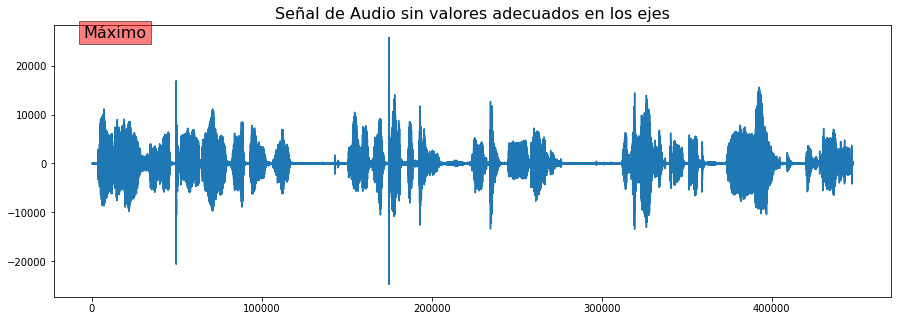

In [425]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
plt.plot(Audiodata) # Audiodata es un numpy array
plt.text(0-5000, np.max(Audiodata), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.title('Señal de Audio sin valores adecuados en los ejes',size=16);

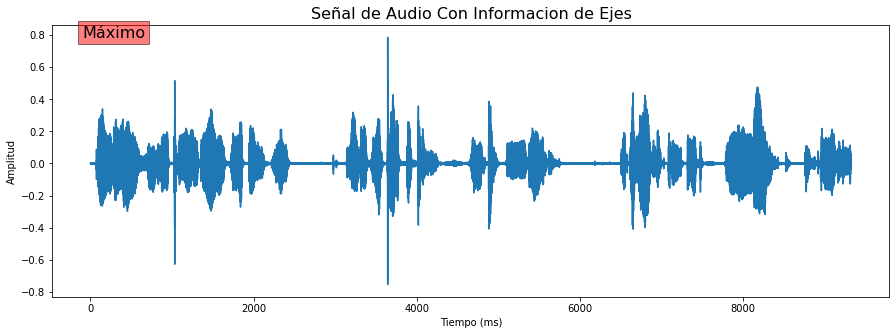

In [426]:
plt.rcParams['figure.figsize'] = (15, 5) # Definir el tamaño de graficas
# Definir los valores de los datos de amplitud entre [-1 : 1] Audiodata.dtype es int16
AudiodataScaled = Audiodata/(2**15)

#definir los valores del eje x en milisegundos
timeValues = np.arange(0, len(AudiodataScaled), 1)/ fs # Convertir Muestras/Seg a Segundos
timeValues = timeValues * 1000  #Escala de tiempo en milisegundos

plt.plot(timeValues, AudiodataScaled);plt.title('Señal de Audio Con Informacion de Ejes',size=16)
plt.text(0-100, np.max(AudiodataScaled), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Amplitud'); plt.xlabel('Tiempo (ms)');

In [427]:
AudiodataScaled

array([-0.00183105, -0.00198364, -0.00204468, ...,  0.00857544,
        0.00894165,  0.00939941])

In [428]:
str(type(AudiodataScaled))

"<class 'numpy.ndarray'>"

In [429]:
len(AudiodataScaled.tolist())


447744

In [430]:
len(timeValues.tolist())

447744

In [431]:
total = list(zip(timeValues.tolist(),AudiodataScaled.tolist()))

In [432]:
df = pd.DataFrame.from_records(total,columns=['time','scala'])

In [433]:
df

,time,scala
0,0.000000,-0.001831
1,0.020833,-0.001984
2,0.041667,-0.002045
3,0.062500,-0.001740
4,0.083333,-0.001404
...,...,...
447739,9327.895833,0.007690
447740,9327.916667,0.008301
447741,9327.937500,0.008575
447742,9327.958333,0.008942


In [434]:
df['scala'].describe()

count    447744.000000
mean         -0.000010
std           0.063680
min          -0.754028
25%          -0.012939
50%          -0.000122
75%           0.009979
max           0.786346
Name: scala, dtype: float64

In [435]:
df['mayor']= df['scala'].apply(lambda x: 1 if x > 0.1 else 0)

In [436]:
df

,time,scala,mayor
0,0.000000,-0.001831,0
1,0.020833,-0.001984,0
2,0.041667,-0.002045,0
3,0.062500,-0.001740,0
4,0.083333,-0.001404,0
...,...,...,...
447739,9327.895833,0.007690,0
447740,9327.916667,0.008301,0
447741,9327.937500,0.008575,0
447742,9327.958333,0.008942,0


Text(0.5, 0, 'Tiempo (ms)')

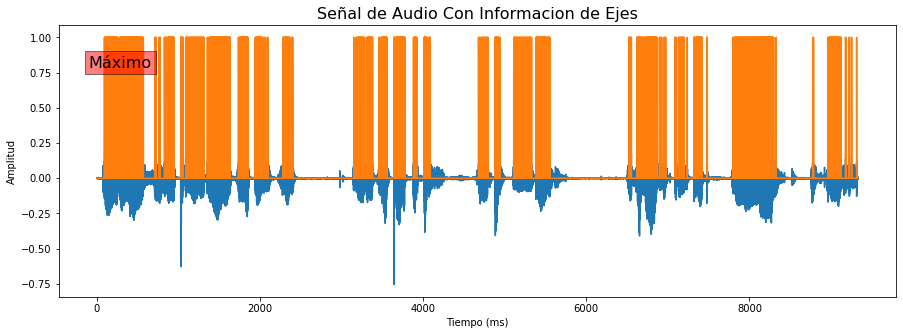

In [437]:
plt.plot(df['time'], df['scala']);plt.title('Señal de Audio Con Informacion de Ejes',size=16)
plt.plot(df['time'],df['mayor'])
plt.text(0-100, np.max(df['scala']), 'Máximo', fontsize = 16,bbox=dict(facecolor='red', alpha=0.5))
plt.ylabel('Amplitud'); plt.xlabel('Tiempo (ms)')

In [438]:
df

,time,scala,mayor
0,0.000000,-0.001831,0
1,0.020833,-0.001984,0
2,0.041667,-0.002045,0
3,0.062500,-0.001740,0
4,0.083333,-0.001404,0
...,...,...,...
447739,9327.895833,0.007690,0
447740,9327.916667,0.008301,0
447741,9327.937500,0.008575,0
447742,9327.958333,0.008942,0


In [439]:
df['time'] = df['time'].apply(lambda x: int(x))

In [440]:
df

,time,scala,mayor
0,0,-0.001831,0
1,0,-0.001984,0
2,0,-0.002045,0
3,0,-0.001740,0
4,0,-0.001404,0
...,...,...,...
447739,9327,0.007690,0
447740,9327,0.008301,0
447741,9327,0.008575,0
447742,9327,0.008942,0


In [449]:
df.groupby('time').mean()

,scala,mayor
time,,
0,0.000275,0.0
1,0.001898,0.0
2,0.001986,0.0
3,-0.000384,0.0
4,-0.000515,0.0
...,...,...
9323,-0.002105,0.0
9324,0.000730,0.0
9325,-0.000786,0.0


In [441]:
no_silence = df[df['mayor'] == 1]

In [442]:
no_silence

,time,scala,mayor
4406,91,0.120758,1
4407,91,0.121246,1
4421,92,0.107208,1
4437,92,0.105347,1
4621,96,0.110992,1
...,...,...,...
447055,9313,0.103180,1
447056,9313,0.109833,1
447057,9313,0.113922,1
447058,9313,0.113892,1


In [443]:
minim = df[(df['scala'] >= -0.754027) & (df['scala'] <= -0.1)]
minim

,time,scala,mayor
4399,91,-0.119263,0
4400,91,-0.121094,0
4412,91,-0.117310,0
4413,91,-0.144684,0
4414,91,-0.144135,0
...,...,...,...
447133,9315,-0.113220,0
447134,9315,-0.110748,0
447135,9315,-0.109070,0
447136,9315,-0.106445,0


In [444]:
minim['scala'].describe()

count    26603.000000
mean        -0.149078
std          0.041351
min         -0.717072
25%         -0.170303
50%         -0.139435
75%         -0.117523
max         -0.100006
Name: scala, dtype: float64

In [445]:
dif_minim = minim['scala'].diff()
dif_minim = dif_minim.fillna(0)
minim['diference'] = dif_minim
minim

/tmp/ipykernel_14345/2887641165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minim['diference'] = dif_minim


,time,scala,mayor,diference
4399,91,-0.119263,0,0.000000
4400,91,-0.121094,0,-0.001831
4412,91,-0.117310,0,0.003784
4413,91,-0.144684,0,-0.027374
4414,91,-0.144135,0,0.000549
...,...,...,...,...
447133,9315,-0.113220,0,0.002777
447134,9315,-0.110748,0,0.002472
447135,9315,-0.109070,0,0.001678
447136,9315,-0.106445,0,0.002625


In [446]:
minim['time'] = minim['time'].apply(lambda x: int(str(int(x))[:-1]))

minmi = minim.groupby('time').sum()

/tmp/ipykernel_14345/4023468339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minim['time'] = minim['time'].apply(lambda x: int(str(int(x))[:-1]))


In [447]:
mayores = minim.sort_values(by= 'diference').head(16)

In [448]:
mayores.sort_values(by = 'time')

,time,scala,mayor,diference
49564,103,-0.492126,0,-0.378204
49592,103,-0.430786,0,-0.300537
49549,103,-0.468842,0,-0.271759
49606,103,-0.597992,0,-0.234131
169708,353,-0.320709,0,-0.196198
169603,353,-0.286438,0,-0.178314
174888,364,-0.619843,0,-0.419525
174923,364,-0.540192,0,-0.371674
174905,364,-0.621490,0,-0.205017
318883,664,-0.298950,0,-0.181641
